<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Neuroscience of Learning, Memory, Cognition <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 <br>
<font color=696880 size=4>

**Name:** Amirhossein Zahedi

**Student Number:** 99101705


# LFP data

What is LFP (Local Field Potential) signal? Explain briefly  (5 points)

Your answer: 
There are many ways for recording signals of brain's activity. Some of them are invasive and some are non-invasive. LFP is an invasive signal in which one or more needles are put in a specific tissue in brain and they can capture voltage changes in a local extracellular tissue. What we mean by local extracellular signal is that the needle is near some neurons and each neuron spikes when is activated, so LFP signal is sum of local neurons' spikes. A spike is a pattern of communication for a neuron and in a spike voltage between intracellular and extracellular fluids change from near -70 milivolts to about +30 milivolts and it repolarize again.

What is Gamma frequency entrainment? Explain (5 points)

Your answer: Signals which are recorded from brain are usually up to 100 Hz and are divided into some bands like deltha,theta,alpha,betha and gamma. Gamma is a frequency band which includes frequencies between 30 to 60 or 100 Hz and it's related to higher cognitive functions in brain like memory, perception, decision etc. 
Many projects have shown that if a visual or auditory stimulus with a specific frequency is shown to the subject, there will be a peak in that frequency in recorded signal's spectrum.
If the stimulus' frequency which is seen or heard by the subject is in gamma band, gamma frequency entrainment can be seen in the brain-related signal.


Study about Gamma frequency entrainment's effect on the subject. Explain how it affects the brain. (This article could be useful: Gamma frequency entrainment attenuats amyloid load and modifies microglia)  (5 points)


Your answer: As discussed above, power of that specific frequency increases while recording signal after showing the stimulus but in the article introduced, gamma frequency entrainment's effect for therapy is discussed. The study likely reports that gamma frequency entrainment leads to a reduction in amyloid load and alters microglial activity in the brain. Findings suggest that gamma frequency entrainment may have therapeutic potential in mitigating Alzheimer's disease pathology by reducing amyloid accumulation and modulating microglial function.

There is an LFP_data file in the zip file, which is located in the CW. This data is related to an experiment with 120 trials and 3 different brain regions of a rat. Each trial consists of 6000 samples, and the sample rate is 2000, resulting in 3 seconds of data per trial. Within this file, there is a channelData matrix that contains recorded data for each region. Additionally, there is a digitalByte vector that specifies when trials began and ended using pulses with an amplitude of 128. Open the file, print the size of the digitalByte and channelData, and then plot the digitalByte.  (5 points)

In [261]:
# import all the necessary libraries here 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

(1495741, 1)
(1495741, 3)


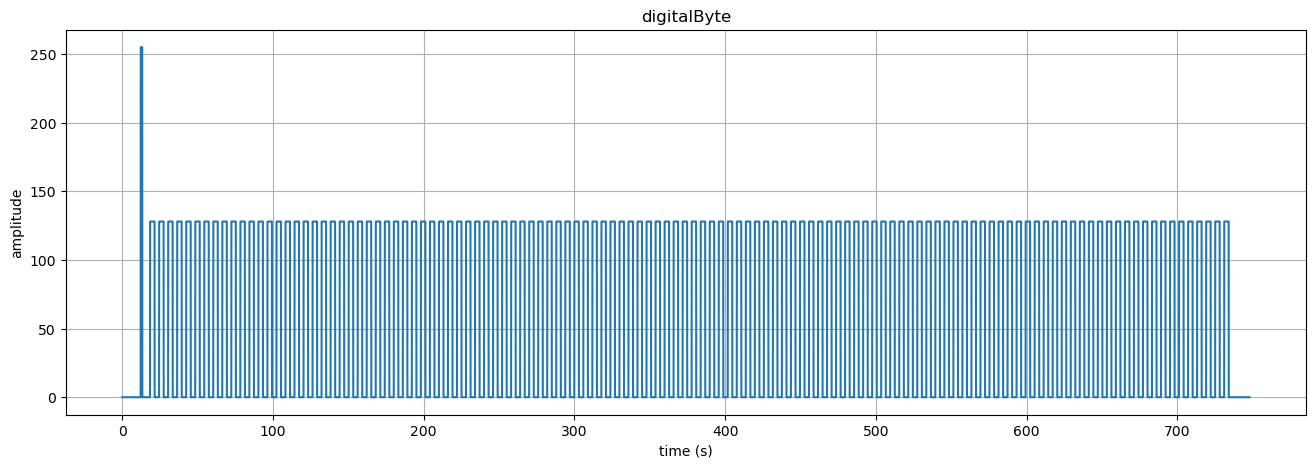

In [262]:
# Load the data from the file provided
#############################
# Your code goes here
data = sp.io.loadmat('sessionData.mat')
data_digitalByte = data['digitalByte']
data_channelData = data['channelData']
data_time = np.transpose(data['time'])

plt.figure(figsize=(16,5))
plt.plot(data_time,data_digitalByte)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.title("digitalByte")
plt.grid('True')
plt.show
#############################

print(data_digitalByte.shape)
print(data_channelData.shape)

# Pre-processing of the data

Now we want to pre process our data. Follow the following steps and explain why we do them:  (points 20)

1. Apply a bandpass filter in the range 1-300 Hz on the signal of each region.

2. Convert the signal to 120 stimulus trials using digitalByte.

3. Apply z-score normalization on each trial.

Preprocessing is very important in signal processings because recorded signal is raw and a big noisy data as we know, environment and many other things can effect and change our signal. By preprocessing we minimize noise effect and seperate trials in order to study them better. As said, first part is filteration in which we filter lower frequencies than 1 Hz and higher than 300 Hz, because brain-related signal has most spectrum between these two. Filtering can reduce noise and DC. We know that EEG or LFP and other brain signals are at most 100 Hz so up to 300 Hz is not needed but I respect the instruction. After filteration we have a big data which has many trials in it, so it's needed to seperate trials from each other. Third step is normalizing. z-score normalization changes mean of the signal to 0 and its std to 1. Normalization is for comparing signals or ... with different scales or envirenment and many other things which can unfair comparing raw signals. So we normalize every trial to some how compare them more fair.

In [263]:
# preprocess
def bandpass_filter(data, low_freq, high_freq):
    # Apply a band pass filter on the data
    #############################
    # Your code goes here
    fs = 2000;
    [b,a] = sp.signal.butter(4, [low_freq/ (fs/2) , high_freq/ (fs/2)], btype='band')
    filtered_data = sp.signal.filtfilt(b,a,data)
    
    return filtered_data
    #############################

def convert_to_trials(data):
    # Extract the trials of the signal
    #############################
    # Your code goes here
    digitalByte = data['digitalByte']
    channelData = data['channelData']
    start_times = []
    end_times = []
    trials_number = 0;
    for i in range(len(digitalByte)-1):
        if data_digitalByte[i] == 0 and digitalByte[i+1] == 128:
            start_times.append(i+1)
        elif data_digitalByte[i] == 128 and digitalByte[i+1] == 0:
            end_times.append(i)
            trials_number = trials_number + 1
    
    trials = np.zeros((120,6000,3))
    for i in range(120):
        trials[i] = channelData[start_times[i] : start_times[i] + 6000]

    return trials
    #############################

def z_score(data):
    # Calculate the z_score for the data and return the results
    #############################
    # Your code goes here
    mean_trials = np.zeros((120,3))
    std_trials = np.zeros((120,3))
    n_trials = np.zeros((120,6000,3))
    for j in range(3):
        for i in range(120):
            mean_trials[i,j] = np.mean(data[i,:,j])
            std_trials[i,j] = np.std(data[i,:,j])
            n_trials[i,:,j] = (data[i,:,j] - mean_trials[i,j]) / std_trials[i,j]

    return n_trials
    #############################
    


# filtering
filtered_data = data
filtered_channelData = np.transpose(bandpass_filter(np.transpose(data_channelData),1,100))
filtered_data['channelData'] = filtered_channelData

# trials seperation
trials_data = convert_to_trials(filtered_data)

# z-score normalization
normalized_trials = z_score(trials_data)


 The three regions represented in the data, respectively, are the Hippocampus, the mPFC (medial Prefrontal Cortex), and the Ventral Striatum. Explain functionality of these regions briefly.  (10 points)

Your answer: Hippocampus is a very important part in brain which does many tasks for example it plays central role in the formation of new memories like experimental memories, it also is essential for spatial memory and navigation. Emotion regulation, learning and some cognitive functions like associative learning and pattern recognition and ... are also related to this impotant part. It's said that Hippocampus is like a leader in an orchestra. 
mPFC or medial Prefrontal Cortex is located in the frontal lobe and has wide range of tasks, most of them are cognitive like problem-solving, decision-making, planning etc. It is also related to social cognition, imotional regulation, working memory, learning and many other cognitive or non-cognitive functions. If we study braing regions and their tasks we can see that they are not seperated from each other and doing a task may relate to many parts of the brain. This is why every region has wide range of functions and many functions are done by more than one region. Let's talk about ventral striatum. The ventral striatumis a region which is involved in the brain's reward system and also has functions related to motivation, reinforcement learning, and emotional processing. We can say that this part is mostly involved in actions which are based of values and reward like value-based decision making or even addiction.

What is ERP of a neural signal ? Calculate the ERP of given data for each region and plot it(set title for x, y axes.)  (10 points)

Your answer: ERP or event related potential is a response or a waveform which occures after the stimulus is seen or heard and it's time locked. EEG or other signals recorded from brain have stochastic form and ERP is a low amplitude waveform and can't be seen in the signal topology, so they record many time-locked trials and find average waveform of those many trials. A special topology with some negative or positive deflections can be seen. These deflections and their latency are meaningful and they are representations of cognitive functions in the brain after the stimulus. For example p300 is a famous deflection which is positive and occures near 300 miliseconds after stimulus.

In [264]:
#ERP calculation
def ERP_calc(data):
    # Calsulate the ERP of the data
    #############################
    # Your code goes here
    trials_number = np.size(data,0)
    ERP_1 = np.zeros(6000)
    ERP_2 = np.zeros(6000)
    ERP_3 = np.zeros(6000)
    for i in range(trials_number):
        ERP_1 = ERP_1 + data[i,:,0]
        ERP_2 = ERP_2 + data[i,:,1]
        ERP_3 = ERP_3 + data[i,:,2]
    ERP_1 = ERP_1 / trials_number
    ERP_2 = ERP_2 / trials_number
    ERP_3 = ERP_3 / trials_number
    
    return ERP_1,ERP_2,ERP_3
    #############################
    
 
ERPs = np.transpose(ERP_calc(normalized_trials))
  

<function matplotlib.pyplot.show(close=None, block=None)>

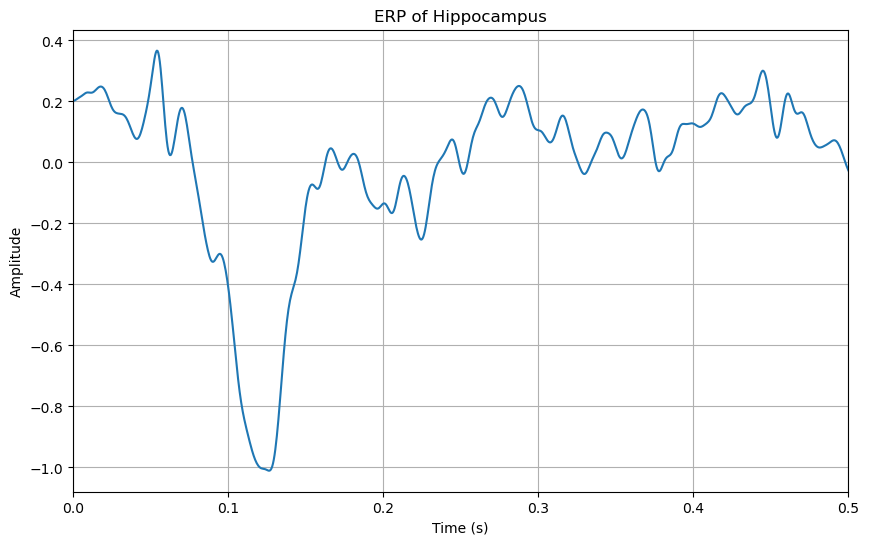

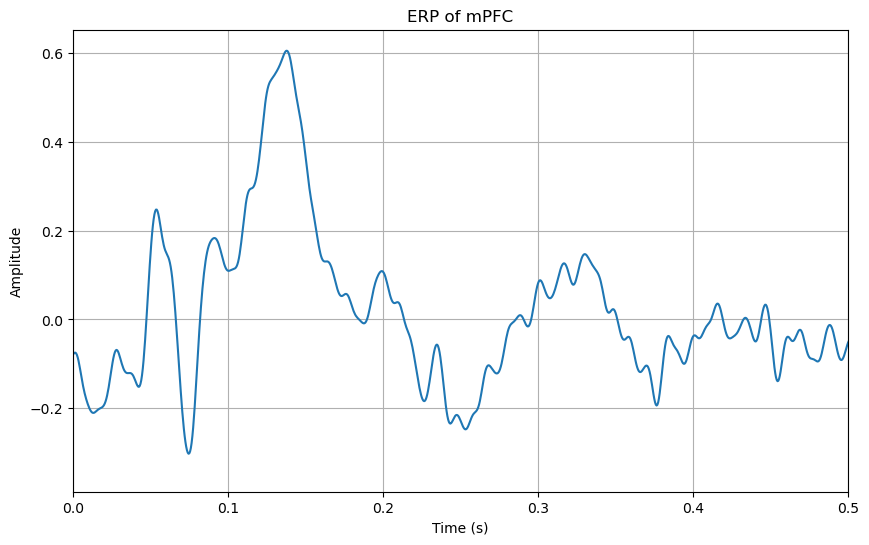

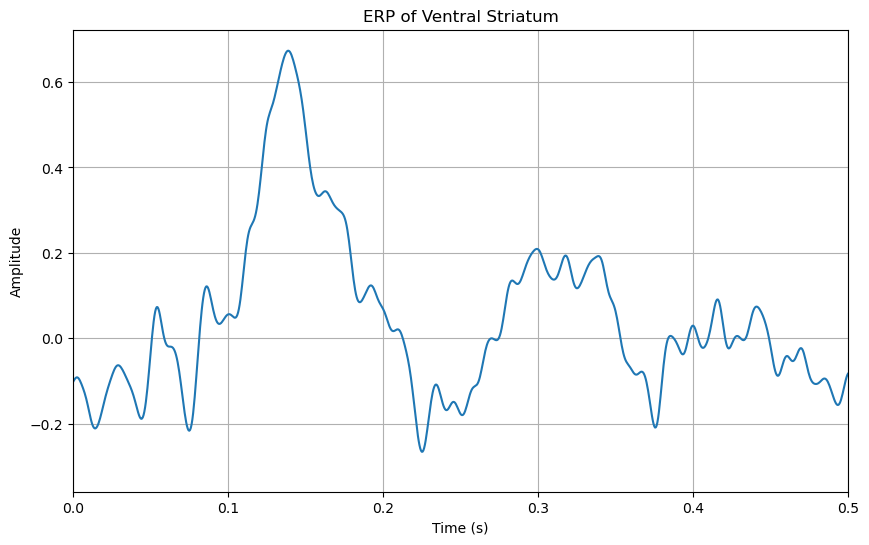

In [265]:
# Plotting ERPs

# In order to show better results, 1 to 100 Hz bandpass filter was used and based on the knowledge about ERPs, 0 to 500 miliseconds is shown and it's
# enough for plotting ERPs. 3 seconds is not needed.

t = np.linspace(0,3,len(trials_data[0,:,0]),endpoint=False)

plt.figure(figsize=(10,6))
plt.plot(t,ERPs[:,0])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("ERP of Hippocampus")
plt.grid('True')
plt.xlim(0,0.5)
plt.show

plt.figure(figsize=(10,6))
plt.plot(t,ERPs[:,1])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("ERP of mPFC")
plt.grid('True')
plt.xlim(0,0.5)
plt.show

plt.figure(figsize=(10,6))
plt.plot(t,ERPs[:,2])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("ERP of Ventral Striatum")
plt.grid('True')
plt.xlim(0,0.5)
plt.show


# Entrainment and some processing techniques

Now we want to observe the effect of the entrainment on the LFP signal.

1. Write a function which takes a signal and it's respective sample rate and calculate it's PSD. (Hint: You can use some specific modules of the mentioned libraries.)

2. Write a function that takes the trials of a signal, calculates the PSD (using part 1) of each trial, and averages these PSDs. We refer to this averaged PSD as the ERSP. Draw ERSP  of Hippocampus, mPFC and Ventral Striatum (set legend, x and y title.) Explain your results.  (20 points)

In [266]:
# ERSP calculation
def PSD(data, sample_rate):
    # Calsulate the PSD of the data
    #############################
    # Your code goes here
    f,psd_periodogram = sp.signal.periodogram(data,sample_rate)
    
    return f,psd_periodogram
    #############################

def ERSP(trials):
    # Calsulate the ERSP of the data
    #############################
    # Your code goes here
    f,psd = PSD(trials[0,:,0],sample_rate=2000)
    ERSP_average = np.zeros((np.size(f,0),3))
    for j in range(3):
        for i in range(1,np.size(trials,0)):
            f,psd = PSD(trials[i,:,j],sample_rate=2000)
            ERSP_average[:,j] = ERSP_average[:,j] + psd
        ERSP_average[:,j] = ERSP_average[:,j] / np.size(trials,0)
    
    return f,ERSP_average
    #############################
    

<function matplotlib.pyplot.show(close=None, block=None)>

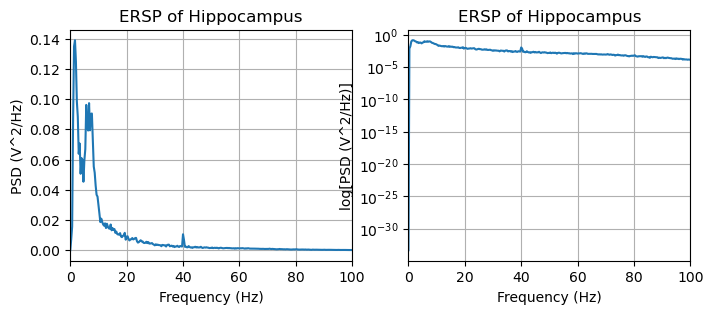

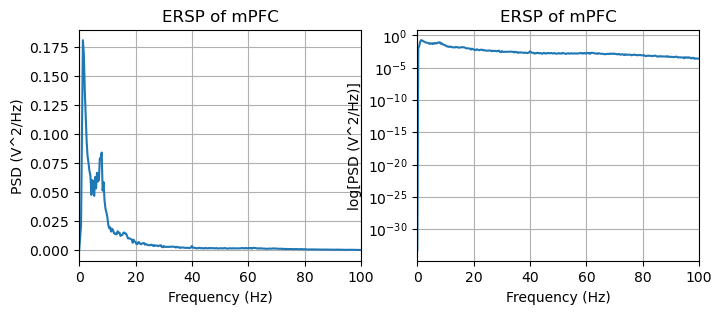

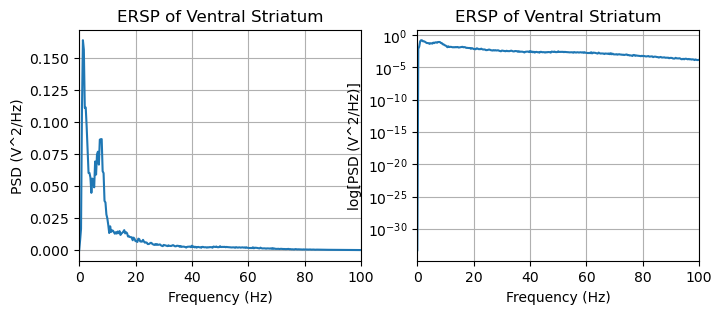

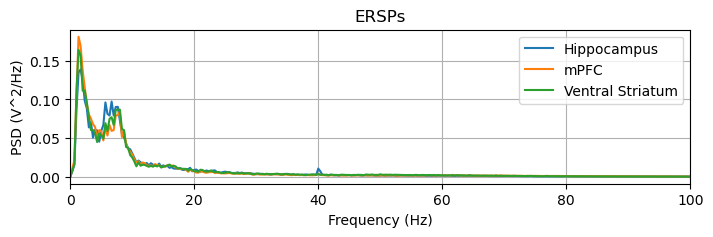

In [267]:
f,ERSP_trial = ERSP(normalized_trials)

# ERSP of Hippocampus
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(f,ERSP_trial[:,0])
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V^2/Hz)")
plt.title("ERSP of Hippocampus")
plt.grid('True')
plt.xlim(0,100)
plt.show
plt.subplot(1,2,2)
plt.semilogy(f,ERSP_trial[:,0])
plt.xlabel("Frequency (Hz)")
plt.ylabel("log[PSD (V^2/Hz)]")
plt.title("ERSP of Hippocampus")
plt.grid('True')
plt.xlim(0,100)
plt.show

# ERSP of mPFC
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(f,ERSP_trial[:,1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V^2/Hz)")
plt.title("ERSP of mPFC")
plt.grid('True')
plt.xlim(0,100)
plt.show
plt.subplot(1,2,2)    
plt.semilogy(f,ERSP_trial[:,1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("log[PSD (V^2/Hz)]")
plt.title("ERSP of mPFC")
plt.grid('True')
plt.xlim(0,100)
plt.show

# ERSP of Ventral Striatum
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(f,ERSP_trial[:,2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V^2/Hz)")
plt.title("ERSP of Ventral Striatum")
plt.grid('True')
plt.xlim(0,100)
plt.show 
plt.subplot(1,2,2)
plt.semilogy(f,ERSP_trial[:,2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("log[PSD (V^2/Hz)]")
plt.title("ERSP of Ventral Striatum")
plt.grid('True')
plt.xlim(0,100)
plt.show           

# Plotting together
plt.figure(figsize=(8,2))
plt.plot(f,ERSP_trial[:,0])
plt.plot(f,ERSP_trial[:,1])
plt.plot(f,ERSP_trial[:,2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V^2/Hz)")
plt.title("ERSPs")
plt.grid('True')
plt.xlim(0,100)
plt.legend(['Hippocampus','mPFC','Ventral Striatum'])
plt.show


Draw PSD of ERP for each region and compare results to ERSPs.(PSDs should be in the same plot. Set legend and proper labels)  (10 points)

<function matplotlib.pyplot.show(close=None, block=None)>

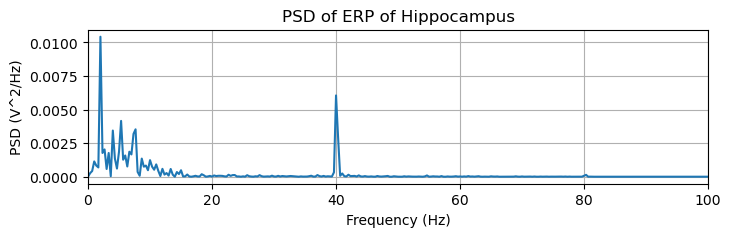

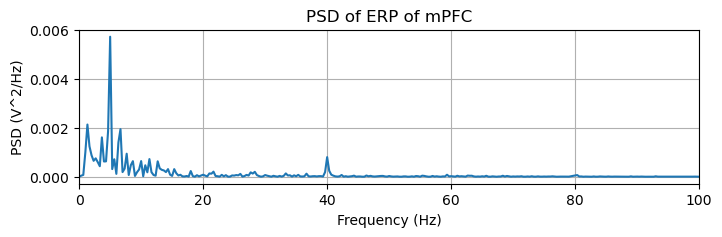

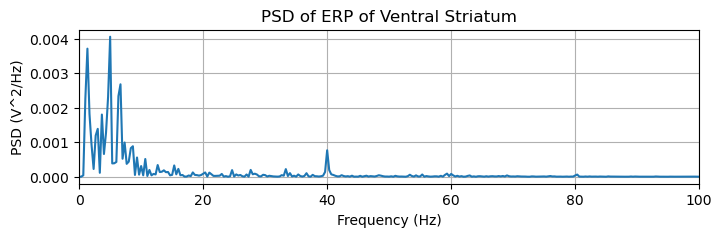

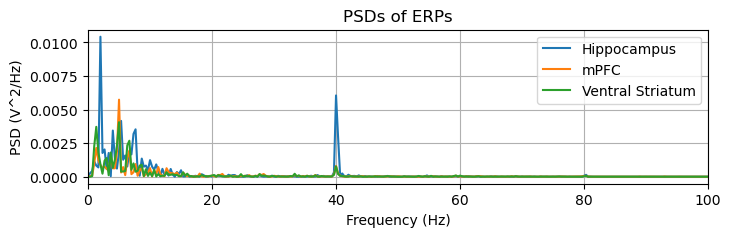

In [268]:
#ERSPs vs PSD of ERPs
#############################
# Your code goes here

f,PSD_ERP_1 = PSD(ERPs[:,0],2000)
f,PSD_ERP_2 = PSD(ERPs[:,1],2000)
f,PSD_ERP_3 = PSD(ERPs[:,2],2000)

# ERSP of Hippocampus
plt.figure(figsize=(8,2))
plt.plot(f,PSD_ERP_1)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V^2/Hz)")
plt.title("PSD of ERP of Hippocampus")
plt.grid('True')
plt.xlim(0,100)
plt.show

# ERSP of mPFC
plt.figure(figsize=(8,2))
plt.plot(f,PSD_ERP_2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V^2/Hz)")
plt.title("PSD of ERP of mPFC")
plt.grid('True')
plt.xlim(0,100)
plt.show

# ERSP of Ventral Striatum
plt.figure(figsize=(8,2))
plt.plot(f,PSD_ERP_3)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V^2/Hz)")
plt.title("PSD of ERP of Ventral Striatum")
plt.grid('True')
plt.xlim(0,100)
plt.show 

# Plotting together
plt.figure(figsize=(8,2))
plt.plot(f,PSD_ERP_1)
plt.plot(f,PSD_ERP_2)
plt.plot(f,PSD_ERP_3)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (V^2/Hz)")
plt.title("PSDs of ERPs")
plt.grid('True')
plt.xlim(0,100)
plt.legend(['Hippocampus','mPFC','Ventral Striatum'])
plt.show
#############################


Comparing results: ERSP is kind of calculating ERP of PSD of trials. ERSPs where shown, but 40 Hz entrainment was not clear and we could see a bit more power in 40 Hz in Hippocampus and the other parts weren't so clear. Maybe averaging psd of trials, can't differentiate between noisy power and signal power. When calculating ERP after PSD, you are averaging square of sum of noise and signal but when you calculate psd of ERP, you first try to lower noise as much as possible by averaging trials and then calculating psd. Second method is clearly better and results show that too. Results from the second method show activity in 40 Hz in the best way, specially Hippocampus.

Functional connectivity (FC) refers to the temporal correlations between spatially remote neurophysiological events. In simpler terms, it’s about how different brain regions communicate and synchronize their activity. Phase-phase coupling is one of the most important types of the FC. Study about PLV and PLI, explain how they are work and compare them. (This article could be useful: Phase lag index: Assessment of functional connectivity from multi channel EEG and MEG with diminished bias from common sources. in this article PLV mentioned as mean phase coherency)  (10 points)

Your answer: For connectivity analysis there are different amplitude or phase methods. PLI and PLV are methods for analysing syncronization of two chanels or regions or ... of an EEG or MEG signal. In PLV which is phase locking value, first we find it's phase in each sample by finding it's analytic form using Hilbert transform. Using arctan of hilbert transform of signal divided by main signal, phase is calculated and can be used in both PLV and PLI calculations. in PLV the absolute value of the mean complex phase angle across trials is computed and it's between 0 to 1. if PLV is 1 it's called that both regions are sync and their phase are alike but when it's 0, they are not phase syncronised. 
PLV was discussed, PLI which is phase lag index is the other way and it calculates the absolute value of the mean sign of the phase angle differences across trials. PLI identifies if phase difference between two signals are consistent or not. PLI = 1 inicates consistent phase lag or lead. In PLV best state is the state in which both signals have exact same phase but in PLI, phase locking is not important but consistency of lagging or leading between phases of two signals. PLI can be better because our brain is a volume conductor and distance between brain dipoles and sensors can creat some lags and phase differences. By using PLI, volume conductor's problem or common source problems are solved.

(Bonus) Study about wPLI. Explain the differences between wPLI and PLI. Suggest a code to calculate wPLI and plot the results. You may use the functions that you have already defined.(Set x,y label and legend)  (25 points)

C:\Users\Zahedi\AppData\Local\Temp\ipykernel_19496\1005116115.py:30: RuntimeWarning: invalid value encountered in true_divide
  wpli1 = np.abs(sum_imag_cs1)/sum_abs_imag_cs1
C:\Users\Zahedi\AppData\Local\Temp\ipykernel_19496\1005116115.py:31: RuntimeWarning: invalid value encountered in true_divide
  wpli2 = np.abs(sum_imag_cs2)/sum_abs_imag_cs2
C:\Users\Zahedi\AppData\Local\Temp\ipykernel_19496\1005116115.py:32: RuntimeWarning: invalid value encountered in true_divide
  wpli3 = np.abs(sum_imag_cs3)/sum_abs_imag_cs3


<function matplotlib.pyplot.show(close=None, block=None)>

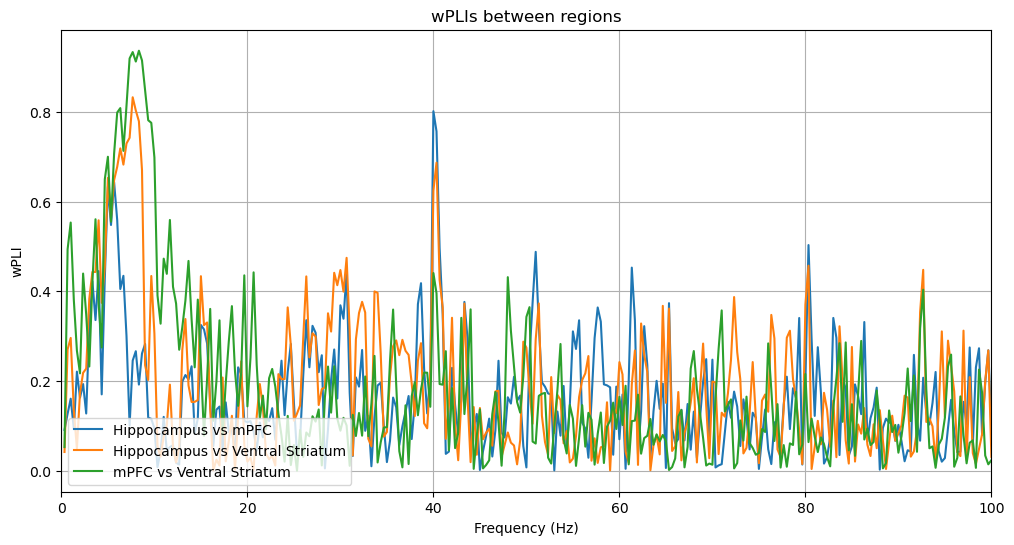

In [269]:
# WPLI
def WPLI(data):
    #############################
    # Your code goes here
    trials_number = np.size(data,0)
    sum_abs_imag_cs1 = 0
    sum_imag_cs1 = 0
    sum_abs_imag_cs2 = 0
    sum_imag_cs2 = 0
    sum_abs_imag_cs3 = 0
    sum_imag_cs3 = 0
    for i in range(trials_number):
        f,cs1 = sp.signal.csd(data[i,:,0],data[i,:,1],fs=2000,nperseg=6000)
        f,cs2 = sp.signal.csd(data[i,:,0],data[i,:,2],fs=2000,nperseg=6000)
        f,cs3 = sp.signal.csd(data[i,:,1],data[i,:,2],fs=2000,nperseg=6000)
        imag_cs1 = np.imag(cs1)
        abs_imag_cs1 = np.abs(imag_cs1)
        imag_cs2 = np.imag(cs2)
        abs_imag_cs2 = np.abs(imag_cs2)
        imag_cs3 = np.imag(cs3)
        abs_imag_cs3 = np.abs(imag_cs3)
        
        sum_abs_imag_cs1 = sum_abs_imag_cs1 + abs_imag_cs1
        sum_imag_cs1 = sum_imag_cs1 + imag_cs1
        sum_abs_imag_cs2 = sum_abs_imag_cs2 + abs_imag_cs2
        sum_imag_cs2 = sum_imag_cs2 + imag_cs2
        sum_abs_imag_cs3 = sum_abs_imag_cs3 + abs_imag_cs3
        sum_imag_cs3 = sum_imag_cs3 + imag_cs3
        
    wpli1 = np.abs(sum_imag_cs1)/sum_abs_imag_cs1
    wpli2 = np.abs(sum_imag_cs2)/sum_abs_imag_cs2
    wpli3 = np.abs(sum_imag_cs3)/sum_abs_imag_cs3
    
    return f,wpli1,wpli2,wpli3    
    #############################

f,wpli1,wpli2,wpli3 = WPLI(normalized_trials)

# Plotting wPLIs
plt.figure(figsize=(12,6))
plt.plot(f,wpli1)
plt.plot(f,wpli2)
plt.plot(f,wpli3)
plt.xlabel("Frequency (Hz)")
plt.ylabel("wPLI")
plt.title("wPLIs between regions")
plt.grid('True')
plt.legend(['Hippocampus vs mPFC','Hippocampus vs Ventral Striatum','mPFC vs Ventral Striatum'],loc='lower left')
plt.xlim(0,100)
plt.show 

I don't know if the result is good or correct but entrainment on 40 Hz and its harmonic on 80 Hz can be seen.

About wPLI and its difference with PLI : wPLI is a better version of the PLI which cares about strength or reliability of phase differences between two signals. It is computed by taking the absolute value of the mean of the weighted phase differences, where weights are assigned based on the magnitude or reliability of the phase differences. It is like PLI but PLI doesn't consider the strength or reliability of phase differences. In PLI, phase differences are weighted as
$-1$ or $1$ according to their sign. In wPLI, phase differences
are weighted based on their value, meaning that phase differences closer to
$\pm\frac{\pi}{2}$ are weighted more heavily than those close to
$0$ or any other multiple of $\pi$.

This avoids a discontinuity at the transition between positive and negative
phase, treating all phase differences near this transition in a similar way.
This provides some robustness against outliers and noise when estimating
connectivity. For instance, volume conduction can distort EEG/MEG recordings,
wherein signals emanating from the same neural source will be picked up by
multiple sensors on the scalp. This can effect connectivity estimations,
bringing the relative phase differences between two signals close to
$0$. wPLI minimizes the contribution of phase relationships that are
small but non-zero (and may thus be attributed to volume conduciton), while
PLI weighs these in the same way as phase relationships of
$\pm\frac{\pi}{2}$.